In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from experiment import Experiment
from environments import UnityEnv
from ddpg_agent import DDPGAgent
from models import FCDP, FCQV
from replay_buffer import ReplayBuffer
from strategy import NormalNoiseDecayStrategy
import torch
from torch import nn
from plots import *
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

In [4]:
def create_agent(nS, nA):
    ones = np.ones(nA)
    action_bounds = (-ones, ones)
    actor = FCDP(nS, action_bounds, (256, 256))
    critic = FCQV(nS, nA, (256, 256))
    memory = ReplayBuffer(50000)
    train_strategy = NormalNoiseDecayStrategy(action_bounds)    
    agent = DDPGAgent(actor, critic, memory, train_strategy, 
                      gamma=.99,
                      batch_size=128,
                      actor_lr=1e-4,
                      critic_lr=3e-4,
                      actor_max_grad_norm=float('inf'),
                      critic_max_grad_norm=float('inf'),
                      train_every_steps=1, 
                      update_target_every_steps=1,
                      tau=.005)
    return agent

In [5]:
env = UnityEnv('Reacher_Linux_NoVis_1/Reacher.x86_64')
agent = create_agent(env.nS, env.nA)

Found path: /home/p.bazan/sources/courses_materials/playground/rl/udacity_p2/Reacher_Linux_NoVis_1/Reacher.x86_64


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### Training DDPG agent
Skip if you want to load checkpoint

In [6]:
exp = Experiment(env, agent, target_points=30.)
exp.train(500)

Episode: 160, score: 38.1, avg_score: 29.0 agent ▶ avg_loss: -5.4 avg_policy_loss: -5.4 avg_value_loss: 0.0 train_iter: 160361 update_iter: 160361 memory_size: 50000Agent passed grading achieving min score:7.6699998285621405, mean score: 30.06599932797253


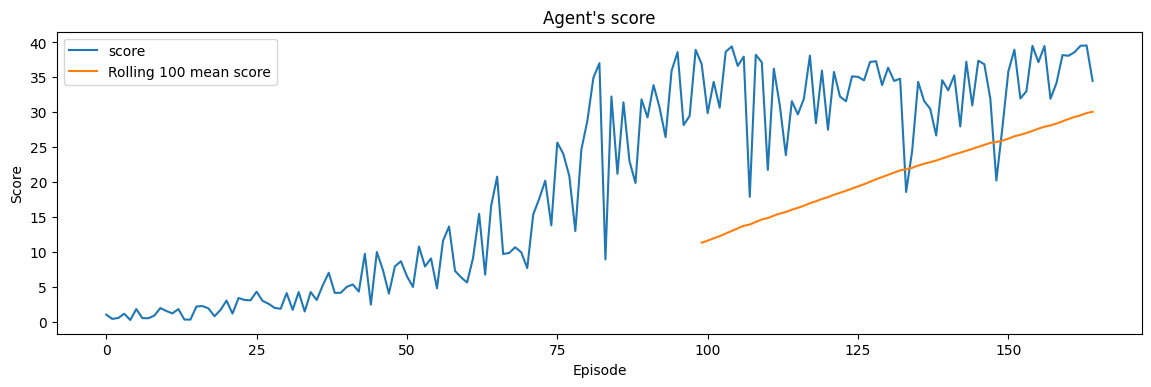

In [19]:
plot_scores(exp.history)
plt.savefig('reacher1_score.png')

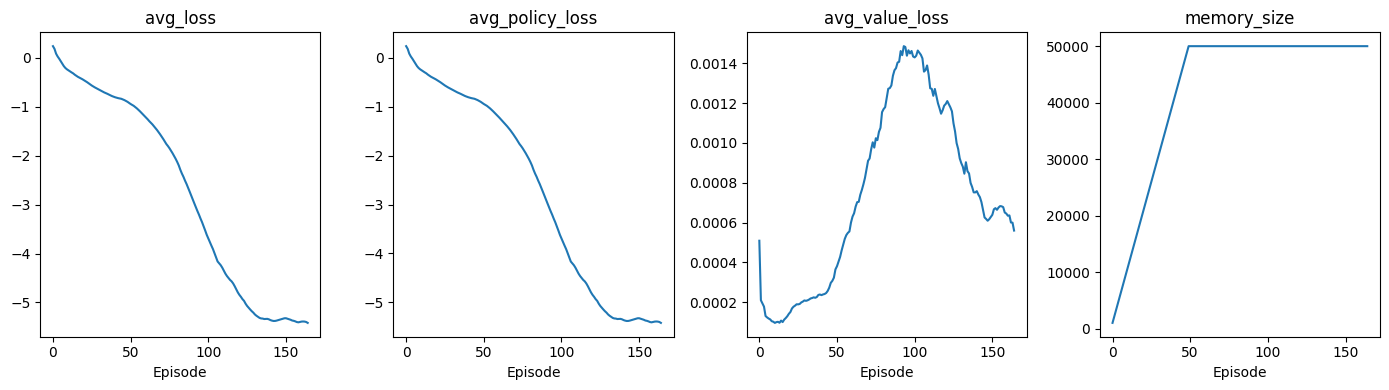

In [20]:
plot_agent_stats(exp.history, stats=['avg_loss', 'avg_policy_loss', 'avg_value_loss', 'memory_size'])
plt.savefig('reacher1_agent_stats.png')

In [22]:
exp.store('ddpg_reacher1')

### Load from checkpoint

In [5]:
env = UnityEnv('Reacher_Linux_NoVis_1/Reacher.x86_64')
agent = create_agent(env.nS, env.nA)
exp2 = Experiment(env, agent, target_points=13.)

Found path: /home/p.bazan/sources/courses_materials/playground/rl/udacity_p2/Reacher_Linux_NoVis_1/Reacher.x86_64


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
exp2.load('ddpg_reacher1')

### Evaluate agent

In [7]:
res = exp2.evaluate(25)

100%|██████████| 25/25 [01:52<00:00,  4.49s/it]


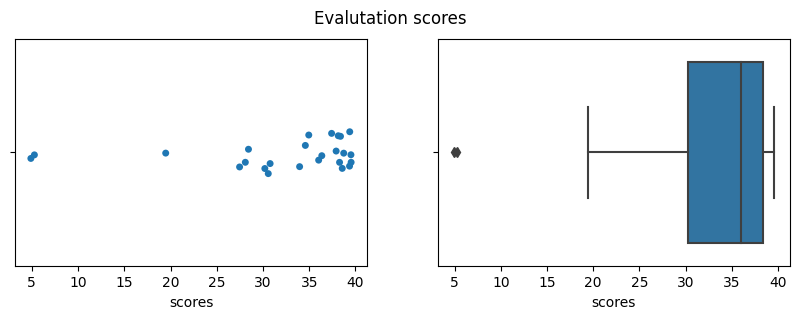

In [9]:
fig, axes = plt.subplots(1,2, figsize=(10, 3))
sns.stripplot(x='scores', data=res, ax=axes[0]);
sns.boxplot(x='scores', data=res, ax=axes[1])
plt.suptitle('Evalutation scores')
plt.savefig('evaluation_scores.png')